In [1]:
from pyomo.environ import *
import numpy as np 
import pandas as pd
import random 
import matplotlib.pyplot as plt

In [13]:
model = ConcreteModel()

# Sets
teams = [1,2,3,4,5,6,7,8,9,10] 
days = [1,2,3,4,5,6,7,8,9]  

# Variable
model.x = Var(teams, teams, days, within=Binary)

# Constraints
model.constraints = ConstraintList()

for t in days:
    for i in teams:
        model.xconstraints.add(model.x[i,i,t] == 0)


for i in teams:
    for j in teams:
        if i<j:
            model.xconstraints.add(sum(model.x[i,j,t] + model.x[j,i,t] for t in days) == 1)

for i in teams:
    for t in days:
        model.xconstraints.add(sum(model.x[i,j,t] + model.x[j,i,t] for j in teams if j!=i ) == 1)

# Solving the model
solver = SolverFactory('gurobi')  
solver.solve(model)

# Printing the solution
l=[]
for t in days:
    print("Day", t)
    for i in teams:
        for j in teams:
            if model.x[i, j, t].value == 1:
                print("Team", i, "plays against Team", j)
                a= (i,j,t)
                l.append(a)
                

#oynanan maçları 01 gibi set et(upper bound ile yaz). objective function güncelle round round

Day 1
Team 3 plays against Team 8
Team 4 plays against Team 7
Team 5 plays against Team 6
Team 9 plays against Team 2
Team 10 plays against Team 1
Day 2
Team 2 plays against Team 10
Team 6 plays against Team 4
Team 7 plays against Team 3
Team 8 plays against Team 5
Team 9 plays against Team 1
Day 3
Team 5 plays against Team 4
Team 6 plays against Team 3
Team 7 plays against Team 2
Team 8 plays against Team 1
Team 10 plays against Team 9
Day 4
Team 3 plays against Team 5
Team 4 plays against Team 10
Team 7 plays against Team 1
Team 8 plays against Team 2
Team 9 plays against Team 6
Day 5
Team 1 plays against Team 6
Team 2 plays against Team 5
Team 3 plays against Team 10
Team 8 plays against Team 7
Team 9 plays against Team 4
Day 6
Team 1 plays against Team 5
Team 3 plays against Team 9
Team 4 plays against Team 8
Team 6 plays against Team 2
Team 10 plays against Team 7
Day 7
Team 2 plays against Team 3
Team 4 plays against Team 1
Team 5 plays against Team 10
Team 6 plays against Team 8

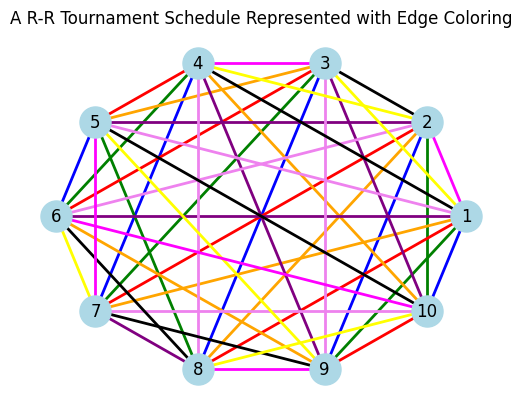

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.complete_graph(10)  # Create a complete graph with 6 nodes

# Create a color map for the edges
color_map = ['blue', 'green', 'red', 'orange', 'purple','violet','black','yellow', 'magenta']  # Choose colors for each day

# Create an empty dictionary to store the edge colors
edge_colors = {}

# Iterate over the schedule and store the colors for the edges
for match in l:
    team1, team2, day = match
    team1 -= 1  # Adjust team number to start from 0
    team2 -= 1  # Adjust team number to start from 0
    edge = (team1, team2)
    if day in edge_colors:
        edge_colors[day].append(edge)  # Add edge to the existing day's list
    else:
        edge_colors[day] = [edge]  # Create a new list for the day

# Draw the graph with colored edges
pos = nx.circular_layout(G)  # Choose a layout for node positions

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

# Draw edges with colors
for day, edges in edge_colors.items():
    color = color_map[day - 1]  # Get the color for the day
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, width=2)

# Draw labels with adjusted node names
node_labels = {node: node + 1 for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='black', font_size=12)

# Set plot properties
plt.axis('off')
plt.title('A R-R Tournament Schedule Represented with Edge Coloring')
plt.savefig('Unconstrained 6 team R-R schedule.png')

# Show the plot
plt.show()
